<a href="https://colab.research.google.com/github/lucasleonardobs/Inteligent-Systems/blob/main/4_%5BPerceptron_Multi_camadas%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

In [ ]:
SEED = 28_01_2022 # Equivale a 28012022

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, _ , y_train, _ = train_test_split(X_train, y_train, 
                                          test_size = .98, 
                                          random_state=SEED, 
                                          stratify=y_train)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Com arrays numpy, operações aritméticas acontecem ponto a ponto, ou seja, são aplicados em todos os elementos do tensor
X_train = X_train/255 
X_test = X_test/255

In [ ]:
print(X_train.shape)
print(X_train[0].shape)
print(y_train.shape)

(1200, 28, 28)
(28, 28)
(1200,)


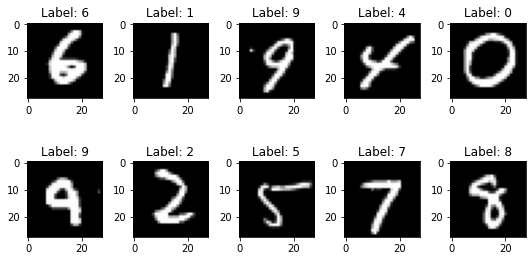

In [ ]:
num = 10
images = X_train[:num] #Obtendo as "num" primeiras imagens
labels = y_train[:num]

num_row = 2
num_col = 5# plot images

fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))

for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [ ]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [ ]:
# Observem os métodos
X_train.shape, X_test.shape

((1200, 784), (10000, 784))

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

mlp = MLPClassifier(random_state = SEED)
mlp.fit(X_train, y_train)

MLPClassifier(random_state=28012022)

In [ ]:
accuracy_score(y_test, mlp.predict(X_test))

0.8973

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definindo a lista de parâmetros e seus possíveis valores.`
# Com o GridSearchCV, um dicionário é definido com os nomes dos parâmetros sendo sua chave
# Cada chave recebe uma lista valores.
# O modelo é treinado com cada combinaçao possível dos parâmetros

parameters = {
    "hidden_layer_sizes": [[400, 200], [400, 200, 100]],
    "activation": ["logistic", "tanh", "relu"],
    "solver": ["lbfgs", "sgd", "adam"]
}


# Notem que a validação agora demora mais que com os modelos que usamos até então.
# Quando atribuímos um número inteiro (quantidade de folds) ao parâmetro cv, a validação cruzada é estratificada, 
# ou seja, ela conserva as proporções originais das classes.
grid_search = GridSearchCV(MLPClassifier(), 
                    parameters,
                    scoring  = "accuracy",
                    n_jobs= -1, 
                    verbose=3,
                    cv = 3)

grid_search.fit(X_train, y_train)
# No output abaixo, notem que foram feitos 60 fits, ou seja, 60 treinamentos.
# Cada combinação de parâmetro é treinada 5 vezes por meio da validação cruzada

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [[400, 200], [400, 200, 100]],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='accuracy', verbose=3)

In [ ]:
# Extraindo os melhores parâmetros
best_params = grid_search.best_params_
# best_params = {'activation': 'relu', 'hidden_layer_sizes': 400}

In [ ]:
print(best_params)
means = grid_search.cv_results_["mean_test_score"]
stds = grid_search.cv_results_["std_test_score"]

for mean, std, params in zip(means, stds, grid_search.cv_results_["params"]):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

{'activation': 'relu', 'hidden_layer_sizes': [400, 200, 100], 'solver': 'adam'}
0.865 (+/-0.020) for {'activation': 'logistic', 'hidden_layer_sizes': [400, 200], 'solver': 'lbfgs'}
0.113 (+/-0.000) for {'activation': 'logistic', 'hidden_layer_sizes': [400, 200], 'solver': 'sgd'}
0.875 (+/-0.021) for {'activation': 'logistic', 'hidden_layer_sizes': [400, 200], 'solver': 'adam'}
0.838 (+/-0.035) for {'activation': 'logistic', 'hidden_layer_sizes': [400, 200, 100], 'solver': 'lbfgs'}
0.113 (+/-0.000) for {'activation': 'logistic', 'hidden_layer_sizes': [400, 200, 100], 'solver': 'sgd'}
0.853 (+/-0.019) for {'activation': 'logistic', 'hidden_layer_sizes': [400, 200, 100], 'solver': 'adam'}
0.867 (+/-0.015) for {'activation': 'tanh', 'hidden_layer_sizes': [400, 200], 'solver': 'lbfgs'}
0.868 (+/-0.000) for {'activation': 'tanh', 'hidden_layer_sizes': [400, 200], 'solver': 'sgd'}
0.872 (+/-0.027) for {'activation': 'tanh', 'hidden_layer_sizes': [400, 200], 'solver': 'adam'}
0.868 (+/-0.012) 

In [ ]:
from sklearn.metrics import classification_report

y_pred = grid_search.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       980
           1       0.96      0.97      0.97      1135
           2       0.92      0.89      0.90      1032
           3       0.87      0.92      0.90      1010
           4       0.88      0.91      0.90       982
           5       0.93      0.85      0.89       892
           6       0.93      0.92      0.92       958
           7       0.95      0.88      0.92      1028
           8       0.87      0.87      0.87       974
           9       0.88      0.91      0.89      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
mlp = MLPClassifier(**best_params)

mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=[400, 200, 100])

In [ ]:
print(classification_report(y_test, mlp.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       980
           1       0.95      0.97      0.96      1135
           2       0.92      0.89      0.90      1032
           3       0.88      0.92      0.90      1010
           4       0.89      0.92      0.91       982
           5       0.93      0.84      0.88       892
           6       0.92      0.92      0.92       958
           7       0.95      0.90      0.92      1028
           8       0.86      0.87      0.86       974
           9       0.89      0.90      0.90      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



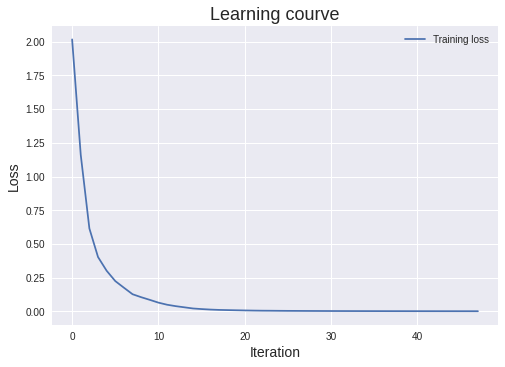

In [ ]:
plt.style.use('seaborn')
plt.plot(range(len(mlp.loss_curve_)), mlp.loss_curve_, label = 'Training loss')
plt.ylabel('Loss', fontsize = 14)
plt.xlabel('Iteration', fontsize = 14)
plt.title('Learning courve', fontsize = 18)
plt.legend()

# Exercício
Para responder aos exercícios anteriores, basta complementar este notebook ou, se preferir, criar um outro com apenas os experimentos que interessam.

* Executar o grid search nos parâmetros "solver" e "activation".
* Validar com 2 e 3 camadas ocultas (*hidden_layer_sizes*). Vocês devem fixar um tamanho (quantidade de neurônios) para cada camada. Ou seja, não é necessário treinar a quantidade de neurônios por camada. Basta treinar a quantidade de camadas. Por **exemplo**:
  * Para duas camadas vc pode treinar com (20, 10)
  * Para três camadas, vc pode treinar com (40, 20, 10)
  * Os valores anteriores são apenas exemplos. Experimentem tamanhos menores ou maiores. Não necessariamente as primeiras camadas precisam ser maiores que as seguintes.
* O segredo para saber responder o item anterior é entender bem os valores esperados no parâmtro *hidden_layer_sizes*.
* Usar apenas 3 folds na validação cruzada.
* Plotar a curva de aprendizado com o modelo treinado com os melhores parâmetros.

